In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('admission_predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
def zeroone(num):
    if num>0.5:
        return 1
    else:
        return 0

In [10]:
 df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [14]:
df['Chance of Admit ']=df['Chance of Admit '].apply(zeroone)

In [15]:
df['Chance of Admit '].unique()

array([1, 0], dtype=int64)

In [17]:
df.drop(columns='Serial No.',inplace=True)

In [18]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.364446
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.360251
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.264050
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.271841
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.333770
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.420550
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.207938
Chance of Admit,0.364446,0.360251,0.264050,0.271841,0.333770,0.420550,0.207938,1.000000


<AxesSubplot:>

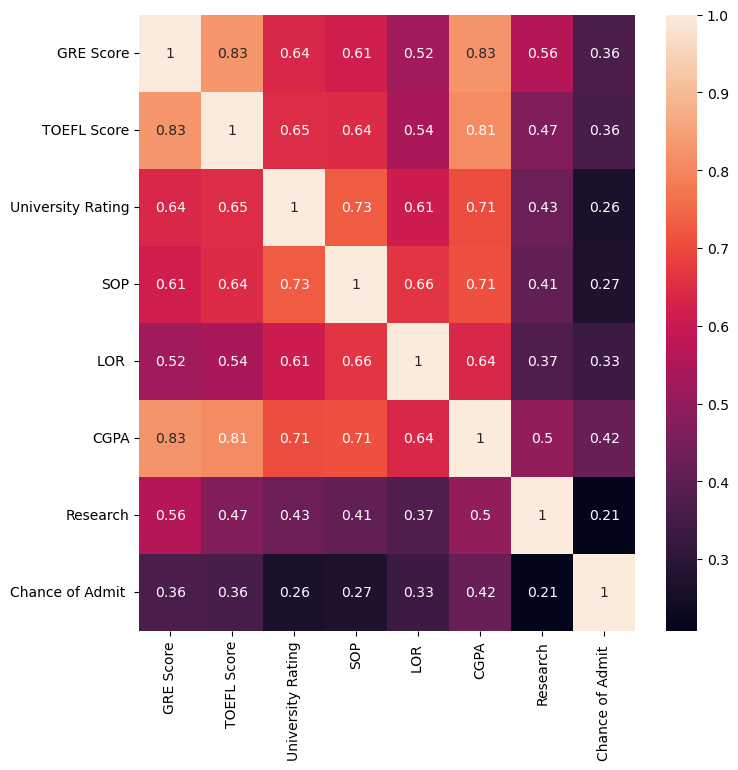

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [23]:
x=df.drop(columns='Chance of Admit ')
y=df['Chance of Admit ']

In [24]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Chance of Admit , Length: 500, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [31]:
x_train.shape

(425, 7)

In [32]:
x_test.shape

(75, 7)

In [33]:
from sklearn.tree import DecisionTreeClassifier 

In [34]:
model=DecisionTreeClassifier()

In [35]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
model.score(x_train,y_train)

1.0

In [38]:
predicted=model.predict(x_test)
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [40]:
accuracy_score(y_test,predicted)

0.9066666666666666

In [41]:
confusion_matrix(y_test,predicted)

array([[ 2,  5],
       [ 2, 66]], dtype=int64)

<AxesSubplot:>

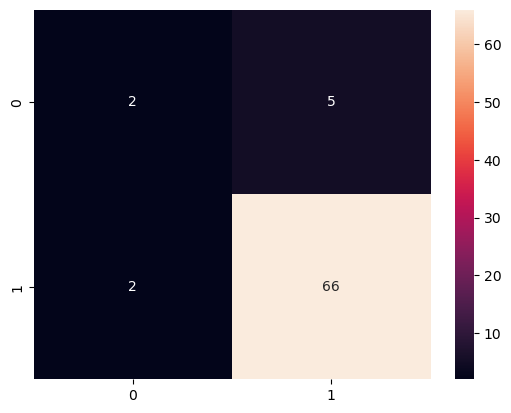

In [42]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt='d')

In [44]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.93      0.97      0.95        68

    accuracy                           0.91        75
   macro avg       0.71      0.63      0.66        75
weighted avg       0.89      0.91      0.89        75

